<a href="https://colab.research.google.com/github/mrDonoghue/ADS-Block1-2223/blob/main/nb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions
* [go here for live instructions](https://docs.google.com/document/d/1Xtir6QuaGYkSYsbpLFpuMwUUNNEGsWmtLhDk1k3bR8g/edit?usp=sharing)

# Math

## Linear algebra
* Physics student perspective of vector: arrow with direction and magnitude/length
* CS student perspective of vector: array/list of numbers
* scalar: just a number, you silly billy
* 2 fundamental things we do to vectors:
  - add 2 vectors
  - multiply a vector by a scalar

* Give an example of each of the above


# Ethics
* [Algorithm cuts healthcare](https://www.theverge.com/2018/3/21/17144260/healthcare-medicaid-algorithm-arkansas-cerebral-palsy)
* [Youtube and conspiracy theories](https://www.nytimes.com/2019/02/19/technology/youtube-conspiracy-stars.html)
* [Biased facial recognition](https://www.theverge.com/2019/1/25/18197137/amazon-rekognition-facial-recognition-bias-race-gender)



# Case study
* Topic: TODO
* Link: TODO
* One sentence summary: TODO
* Who was harmed?: TODO
* Notes:
 - TODO
 - TODO
 - TODO
* Thoughts:
  - TODO
  - TODO
  - TODO
* Questions:
  - TODO
  - TODO
  - TODO

# Coding

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 5.0 MB/s 
     |████████████████████████████████| 441 kB 50.6 MB/s 
     |████████████████████████████████| 5.3 MB 38.8 MB/s 
     |████████████████████████████████| 1.3 MB 61.3 MB/s 
     |████████████████████████████████| 1.6 MB 51.9 MB/s 
     |████████████████████████████████| 212 kB 30.2 MB/s 
     |████████████████████████████████| 163 kB 57.2 MB/s 
     |████████████████████████████████| 115 kB 53.9 MB/s 
     |████████████████████████████████| 127 kB 60.6 MB/s 
     |████████████████████████████████| 115 kB 60.9 MB/s 
     |████████████████████████████████| 7.6 MB 14.8 MB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastai.vision.all import *
from fastbook import *
import numpy as np
import random
matplotlib.rc('image', cmap='Greys_r')

In [ ]:
num_rows = 200
num_cols = 100
vecs = [random.choices(range(5), k=num_cols)
 for _ in range(num_rows)]
print(len(vecs[0]))

100


In [ ]:
def multiply(vec, scalar):
  res = []
  for num in vec:
    res.append(num * scalar)
  return res



# MNIST

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
# uncompress and download the data
# path is where uncompressed data is saved

In [ ]:
Path.BASE_PATH = path
# from now on, all paths
# are relative to the location of
# our data

In [ ]:
print(path)

/root/.fastai/data/mnist_sample


In [ ]:
path.ls()
# shows the contents of path
# train and valid and directories (aka folders)

(#3) [Path('labels.csv'),Path('train'),Path('valid')]

In [ ]:
(path/'train').ls()
# path/'train' makes a path object
# to path/train which I can ls

(#2) [Path('train/3'),Path('train/7')]

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [ ]:
im3_path = threes[42]
im3 = Image.open(im3_path)
im3
# just to look at things

In [ ]:
array(im3)[4:10,4:10]
# show me rows 4 to 10 (not including 10)
# columns 4 to 10 of im3 as a numpy array

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,   0,   0, 130],
       [  0,   0,   0,   0,   0,  36]], dtype=uint8)

In [ ]:
tensor(im3)[4:10,4:10]
# show me rows 4 to 10 (not including 10)
# columns 4 to 10 of im3 as a pytorch tensor

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,   0,   0, 130],
        [  0,   0,   0,   0,   0,  36]], dtype=torch.uint8)

In [ ]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys_r')
# just for visualization
# sanity check

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,8,78,245,183,25,0,0,0
1,0,0,0,0,0,0,0,0,0,36,157,252,252,252,156,71,0,0
2,0,0,0,0,0,0,16,119,127,223,253,252,252,252,252,250,111,0
3,0,0,0,0,0,29,232,252,252,252,253,252,252,252,252,253,168,0
4,0,0,0,0,0,130,252,252,252,252,236,147,50,182,252,253,168,0
5,0,0,0,0,0,36,243,250,185,62,0,0,145,253,253,230,27,0
6,0,0,0,0,0,0,48,58,0,0,15,121,247,252,252,97,0,0
7,0,0,0,0,0,0,0,0,0,18,148,252,252,252,146,0,0,0
8,0,0,0,0,0,0,0,6,134,239,253,252,247,119,14,0,0,0
9,0,0,0,0,45,168,211,215,252,252,253,252,249,211,124,107,27,0


## First Try: Pixel Similarity

In [ ]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)
# list of tensors of each image

(6131, 6265)

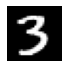

In [ ]:
show_image(three_tensors[1]);
# sanity check

In [ ]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

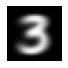

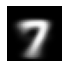

In [ ]:
mean3 = stacked_threes.mean(0)
# mean(0) collapses axis 0.
# stacked_threes's shape is (N, 28,28) where N is the # of
# 3s in training data
# collapsing axis 0, removes the axis at index 0, resulting
# in tensor (mean3) of shape (28, 28)
# similar for stacked_sevens to mean7
mean7 = stacked_sevens.mean(0)

show_image(mean3);
show_image(mean7);

In [ ]:
u = torch.randint(10, (5000,)).float()
v = torch.randint(10, (5000,)).float()


In [ ]:

def slow_dist(a, b):
  # returns Euclidean distance between 2 vectors a, b
  # 
  # squareroot of the sum of the squared
  # component-wise differences
  sum = 0
  for ai, bi in zip(a, b):
    sum += (ai - bi) ** 2
  return sum ** 0.5

def slow_distL1(a,b):
  # returns L1 aka Manhattan distance between 2 vectors a, b
  # 
  # sum of the absolute component-wise differences
  sum = 0
  for ai, bi in zip(a,b):
    sum += abs(ai - bi)
  return sum


d_uv = slow_dist(u,v)
dL1_uv = slow_distL1(v,u)
d_uv, dL1_uv

(tensor(292.8669), tensor(16877.))

In [ ]:
def distance(a,b):
  return ((a-b)**2).sum().sqrt()

def distanceL1(a,b):
  return (a-b).abs().sum()

d_uv = distance(u,v)
dL1_uv = distanceL1(u,v)
d_uv, dL1_uv

(tensor(292.8669), tensor(16877.))

In [ ]:
def mnist_distance(a,b):
  return (a-b).abs().sum((-1,-2))

In [ ]:
## TODO:
# what would be a good sanity check?


In [ ]:
# broadcasting

In [ ]:
dist33 = mnist_distance(mean3, stacked_threes)
dist33.shape


torch.Size([6131])

In [ ]:
threes_valid = (path/'valid'/'3').ls().sorted()
sevens_valid = (path/'valid'/'7').ls().sorted()
seven_tensors_valid = [tensor(Image.open(o)) for o in sevens_valid]
three_tensors_valid = [tensor(Image.open(o)) for o in threes_valid]
stacked_sevens_valid = torch.stack(seven_tensors_valid).float()/255
stacked_threes_valid = torch.stack(three_tensors_valid).float()/255


In [ ]:
# write is_3 function
def is_3(a):
  return (mnist_distance(mean3, a)
   < mnist_distance(mean7, a))

In [ ]:
is_3(stacked_threes[0]), is_3(stacked_sevens[0])

(tensor(True), tensor(False))

In [ ]:
seven_preds_val = is_3(stacked_sevens_valid)
three_preds_val = is_3(stacked_threes_valid)
seven_preds_val

tensor([False, False, False,  ..., False, False, False])

In [ ]:
three_acc = (three_preds_val.float().sum()
/three_preds_val.shape[0])
seven_acc = ((1 - seven_preds_val.float()).sum()
/ seven_preds_val.shape[0])
three_acc.item(), seven_acc.item()



(0.9168316721916199, 0.9854085445404053)

Suppose we arrange for some automatic means of testing the effectiveness of any current weight assignment in terms of actual performance and provide a mechanism for altering the weight assignment so as to maximize the performance. We need not go into the details of such a procedure to see that it could be made entirely automatic and to see that a machine so programmed would "learn" from its experience.